### 1. 데이터 확인

In [1]:
import pandas as pd

# 데이터 불러오기
housing = pd.read_csv('housingdata.csv')

# 데이터 미리보기
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [2]:
# 데이터셋 기본 정보 확인
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [3]:
# 데이터 정보 탐색
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


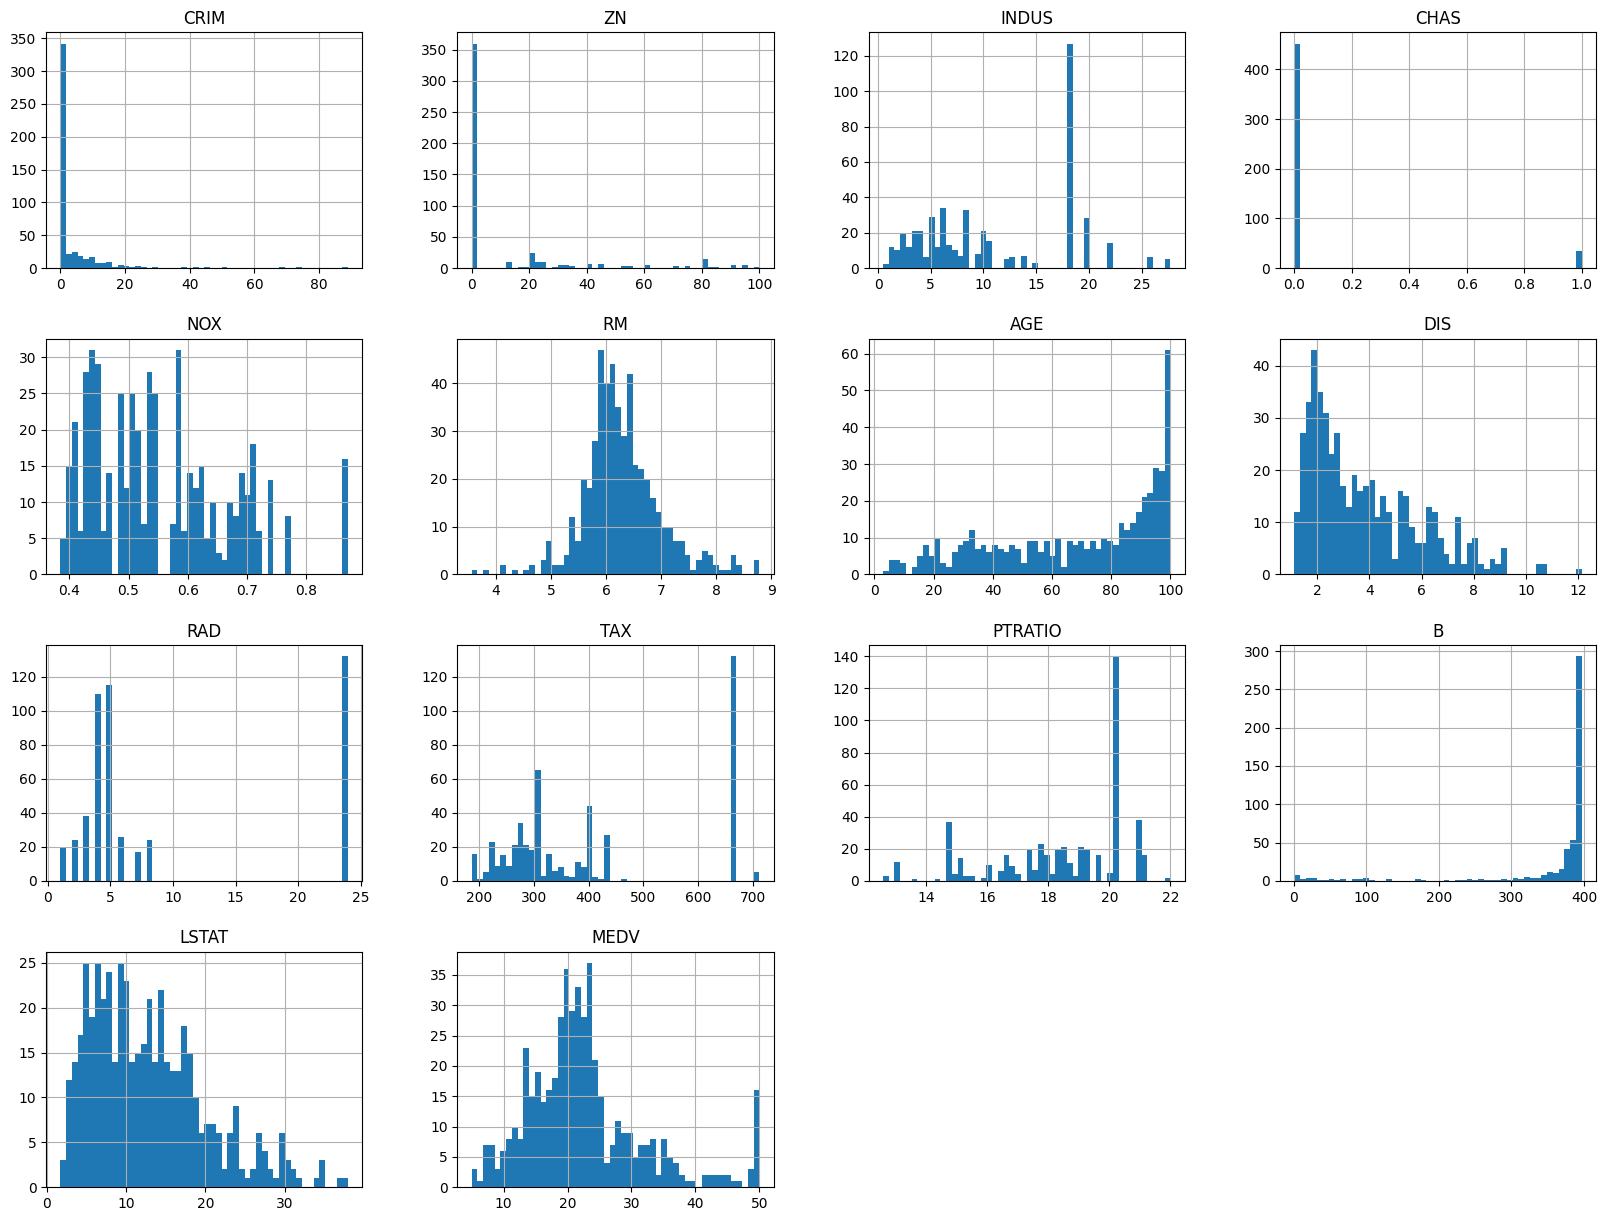

In [4]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

### 2. 데이터 전처리

#### 결측치 처리

In [5]:
# 결측치 개수 확인
housing.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
# 결측치 비율 확인
missing_percentage= (housing.isnull().sum() / len(housing)) * 100
missing_percentage

CRIM       3.952569
ZN         3.952569
INDUS      3.952569
CHAS       3.952569
NOX        0.000000
RM         0.000000
AGE        3.952569
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      3.952569
MEDV       0.000000
dtype: float64

In [7]:
# 결측치 처리
from sklearn.impute import SimpleImputer

# 수치형데이터 결측치 > 중앙값 대체
imputer = SimpleImputer(strategy='median')

for col in ['CRIM', 'ZN', 'INDUS', 'AGE', 'LSTAT'] :
    housing[col] = imputer.fit_transform(housing[[col]])

# 범주형 데이터 결측치 > 최빈값 대체
imputer2 = SimpleImputer(strategy= 'most_frequent')

housing['CHAS'] = imputer2.fit_transform(housing[['CHAS']])

#### 이상치 처리

In [8]:
import numpy as np

numeric_cols = housing.select_dtypes(include=[np.number]).columns # 수치형 데이터를 가진 열들의 이름 가져오기
housing_processed = housing.copy()


for col in numeric_cols:
    Q1 = housing[col].quantile(0.25)
    Q3 = housing[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((housing[col] < lower_bound) | (housing[col] > upper_bound))
    outlier_count = outliers.sum()

    if outlier_count > 0:
        # 이상치를 경계값으로 대체 (Winsorization)
        housing_processed[col] = housing_processed[col].clip(lower=lower_bound, upper=upper_bound)

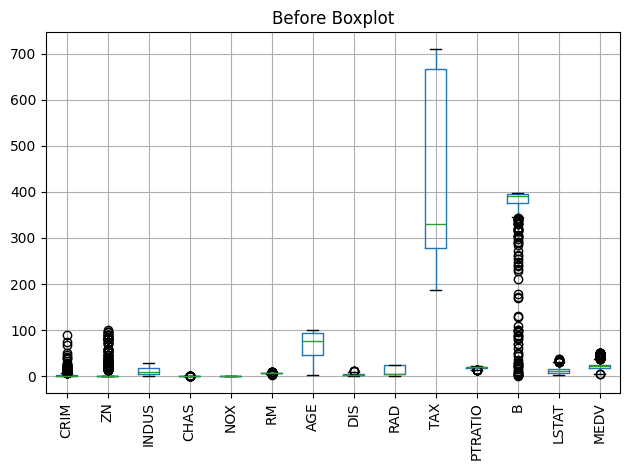

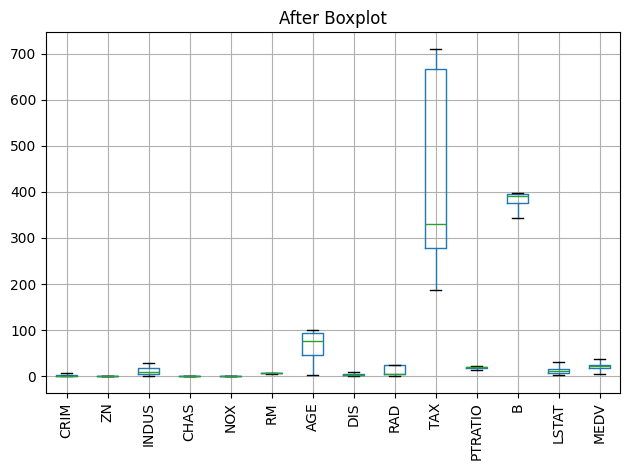

In [9]:
# 이상치 처리 전 데이터 시각화
housing.boxplot()
plt.xticks(rotation=90)
plt.title('Before Boxplot')
plt.tight_layout()
plt.show()

# 이상치 처리 후 데이터 시각화
housing_processed.boxplot()
plt.xticks(rotation=90)
plt.title('After Boxplot')
plt.tight_layout()
plt.show()

#### 시간적 요소 추가

In [10]:
# 이상치가 처리된 housing 데이터에서 TAX 값으로 데이터 정렬
housing_processed = housing_processed.sort_values(by="TAX").reset_index(drop=True)
housing_processed

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01709,0.0,2.02,0.0,0.410,6.728,36.1,9.8208,5,187,17.0,384.46000,4.50,30.1
1,0.06899,0.0,25.65,0.0,0.581,5.870,69.7,2.2577,2,188,19.1,389.15000,14.37,22.0
2,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2,188,19.1,378.09000,17.93,20.5
3,0.07165,0.0,25.65,0.0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67000,14.27,20.3
4,0.09849,0.0,25.65,0.0,0.581,5.879,95.8,2.0063,2,188,19.1,379.38000,17.58,18.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11000,18.07,13.6
502,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4,711,20.1,396.90000,13.35,20.1
503,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09000,18.06,15.2
504,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4,711,20.1,344.10625,29.68,8.1


In [11]:
# TAX값이 올라갈때마다 1을 더하여 시간의 흐름을 표현
housing_processed['TIME'] = (housing_processed['TAX'] != housing_processed['TAX'].shift()).cumsum()
housing_processed

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TIME
0,0.01709,0.0,2.02,0.0,0.410,6.728,36.1,9.8208,5,187,17.0,384.46000,4.50,30.1,1
1,0.06899,0.0,25.65,0.0,0.581,5.870,69.7,2.2577,2,188,19.1,389.15000,14.37,22.0,2
2,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2,188,19.1,378.09000,17.93,20.5,2
3,0.07165,0.0,25.65,0.0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67000,14.27,20.3,2
4,0.09849,0.0,25.65,0.0,0.581,5.879,95.8,2.0063,2,188,19.1,379.38000,17.58,18.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11000,18.07,13.6,66
502,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4,711,20.1,396.90000,13.35,20.1,66
503,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09000,18.06,15.2,66
504,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4,711,20.1,344.10625,29.68,8.1,66


#### 상관관계

In [12]:
# 데이터 상관관계 확인
corr_matrix = housing_processed.corr()
corr_matrix['MEDV'].abs().sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.782941
RM         0.697645
INDUS      0.553140
TAX        0.543545
PTRATIO    0.523993
CRIM       0.522140
TIME       0.511057
NOX        0.506505
AGE        0.454330
RAD        0.452679
DIS        0.333079
B          0.321250
ZN              NaN
CHAS            NaN
Name: MEDV, dtype: float64

In [13]:
# 시각화 분석
plot_cols = ['MEDV', 'LSTAT', 'RM', 'INDUS', 'TAX', 'PTRATIO', 'CRIM', 'NOX', 'AGE', 'RAD', 'DIS', 'B', 'TIME']
plot_housing = housing_processed.loc[:, plot_cols]
plot_housing

,MEDV,LSTAT,RM,INDUS,TAX,PTRATIO,CRIM,NOX,AGE,RAD,DIS,B,TIME
0,30.1,4.50,6.728,2.02,187,17.0,0.01709,0.410,36.1,5,9.8208,384.46000,1
1,22.0,14.37,5.870,25.65,188,19.1,0.06899,0.581,69.7,2,2.2577,389.15000,2
2,20.5,17.93,5.961,25.65,188,19.1,0.09299,0.581,92.9,2,2.0869,378.09000,2
3,20.3,14.27,6.004,25.65,188,19.1,0.07165,0.581,84.1,2,2.1974,377.67000,2
4,18.8,17.58,5.879,25.65,188,19.1,0.09849,0.581,95.8,2,2.0063,379.38000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,13.6,18.07,5.983,27.74,711,20.1,0.10574,0.609,98.8,4,1.8681,390.11000,66
502,20.1,13.35,5.983,27.74,711,20.1,0.11132,0.609,83.5,4,2.1099,396.90000,66
503,15.2,18.06,5.454,27.74,711,20.1,0.15086,0.609,92.7,4,1.8209,395.09000,66
504,8.1,29.68,5.093,27.74,711,20.1,0.20746,0.609,98.0,4,1.8226,344.10625,66


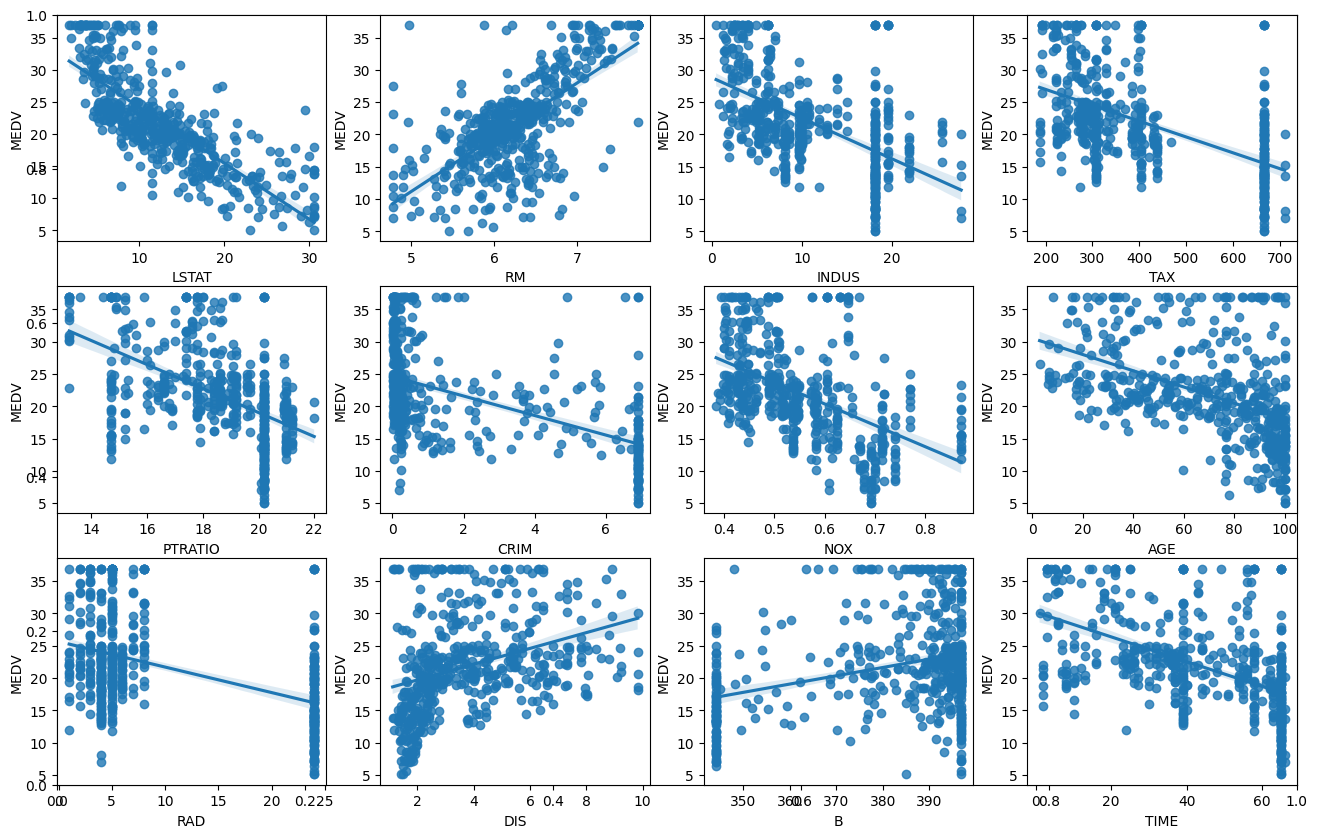

In [14]:
import seaborn as sns

# 선형 회귀선 표시
fig, axs = plt.subplots(figsize=(16, 10))
for i, feature in enumerate(plot_cols[1:]) :
    ax1 = plt.subplot(3,4,i+1)
    sns.regplot(x=feature, y=plot_cols[0], data=plot_housing, ax=ax1)

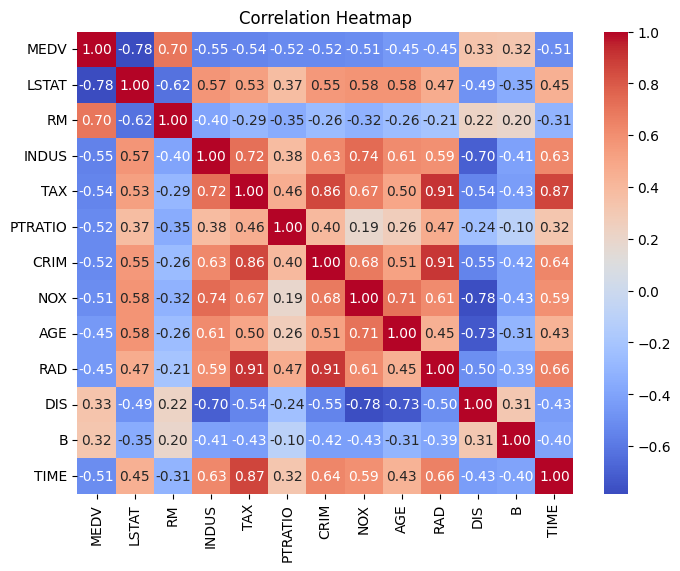

In [15]:
# 상관관계 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(plot_housing.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### 3. 특성과 타겟 변수 분리

In [16]:
# 특성과 타겟 변수 분리
X = housing_processed[['LSTAT', 'RM', 'INDUS', 'TAX', 'PTRATIO', 'CRIM', 'NOX', 'AGE', 'RAD', 'TIME']]  # 독립 변수
y = housing_processed['MEDV']  # 타겟 변수

### 4. 모델 선택 및 훈련

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### 선형회귀

In [18]:
from sklearn.linear_model import LinearRegression

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 선형 회귀 모델 생성 및 학습
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# 예측 
y_lr_pred = lr.predict(X_test_scaled)

# 모델 평가
lr_mae = mean_absolute_error(y_test, y_lr_pred)
lr_mse = mean_squared_error(y_test, y_lr_pred)
lr_r2 = r2_score(y_test, y_lr_pred)

# 데이터 확인
print(f'Mean Absolute Error (MAE) : {lr_mae}')
print(f'Mean Squared Error (MSE) : {lr_mse}')
print(f'R² Score : {lr_r2}')

Mean Absolute Error (MAE) : 2.844664718424545
Mean Squared Error (MSE) : 13.613323603493988
R² Score : 0.8076426144528726


#### 다항 회귀

In [19]:
from sklearn.preprocessing import PolynomialFeatures

# 다항 특징 생성 (차수 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 다항 회귀 모델 생성 및 학습
pr = LinearRegression()
pr.fit(X_train_scaled, y_train)

# 예측 
y_pr_pred = pr.predict(X_test_scaled)

# 모델 평가
pr_mae = mean_absolute_error(y_test, y_pr_pred)
pr_mse = mean_squared_error(y_test, y_pr_pred)
pr_r2 = r2_score(y_test, y_pr_pred)

print(f'Mean Absolute Error (MAE) : {pr_mae}')
print(f'Mean Squared Error (MSE) : {pr_mse}')
print(f'R² Score : {pr_r2}')

Mean Absolute Error (MAE) : 2.1745669244891137
Mean Squared Error (MSE) : 10.828553723051535
R² Score : 0.8469916425928349


#### 의사결정나무

In [20]:
from sklearn.tree import DecisionTreeRegressor

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 의사결정 나무 모델 초기화 및 학습
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# 테스트 세트로 예측 수행
y_tree_pred = tree_model.predict(X_test_scaled)

# 모델 평가
tree_mae = mean_absolute_error(y_test, y_tree_pred)
tree_mse = mean_squared_error(y_test, y_tree_pred)
tree_r2 = r2_score(y_test, y_tree_pred)

print(f'Mean Absolute Error (MAE) : {tree_mae}')
print(f'Mean Squared Error (MSE) : {tree_mse}')
print(f'R² Score : {tree_r2}')


Mean Absolute Error (MAE) : 2.62671568627451
Mean Squared Error (MSE) : 11.558462009803923
R² Score : 0.836677978287313


#### 랜덤포레스트

In [21]:
from sklearn.ensemble import RandomForestRegressor

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 랜덤포레스트 모델 초기화 및 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 테스트 세트로 예측 수행
y_rf_pred = rf_model.predict(X_test_scaled)

# 모델 평가
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f'Mean Absolute Error (MAE) : {rf_mae}')
print(f'Mean Squared Error (MSE) : {rf_mse}')
print(f'R² Score : {rf_r2}')

Mean Absolute Error (MAE) : 2.0439117647058787
Mean Squared Error (MSE) : 7.549554166666663
R² Score : 0.8933241768252906


#### 리지 회귀

In [22]:
from sklearn.linear_model import Ridge

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 리지 회귀 모델 생성 및 학습
ri = Ridge(alpha=1.0)
ri.fit(X_train_scaled, y_train)

# 예측
y_ri_pred = ri.predict(X_test_scaled)

# 모델 평가
ri_mae = mean_absolute_error(y_test, y_ri_pred)
ri_mse = mean_squared_error(y_test, y_ri_pred)
ri_r2 = r2_score(y_test, y_ri_pred)

print(f'Mean Absolute Error (MAE) : {ri_mae}')
print(f'Mean Squared Error (MSE) : {ri_mse}')
print(f'R² Score : {ri_r2}')

Mean Absolute Error (MAE) : 2.8482348351817266
Mean Squared Error (MSE) : 13.64383696062644
R² Score : 0.8072114581993948


#### 라쏘 회귀

In [23]:
from sklearn.linear_model import Lasso

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 라쏘 회귀 모델 생성 및 학습
ls = Lasso(alpha=1.0)
ls.fit(X_train_scaled, y_train)

# 예측
y_ls_pred = ls.predict(X_test_scaled)

# 모델 평가
ls_mae = mean_absolute_error(y_test, y_ls_pred)
ls_mse = mean_squared_error(y_test, y_ls_pred)
ls_r2 = r2_score(y_test, y_ls_pred)

print(f'Mean Absolute Error (MAE) : {ls_mae}')
print(f'Mean Squared Error (MSE) : {ls_mse}')
print(f'R² Score : {ls_r2}')

Mean Absolute Error (MAE) : 3.3502895699192403
Mean Squared Error (MSE) : 17.21104872094395
R² Score : 0.7568064617493341


### 5. 모델 평가

In [24]:
# 모델별 성능 저장
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'Decision Tree', 'Random Forest', 'Ridge Regression', 'Lasso Regression'],
    'MAE': [lr_mae, pr_mae, tree_mae, rf_mae, ri_mae, ls_mae],
    'MSE': [lr_mse, pr_mse, tree_mse, rf_mse, ri_mse, ls_mse],
    'R2': [lr_r2, pr_r2, tree_r2, rf_r2, ri_r2, ls_r2]
})

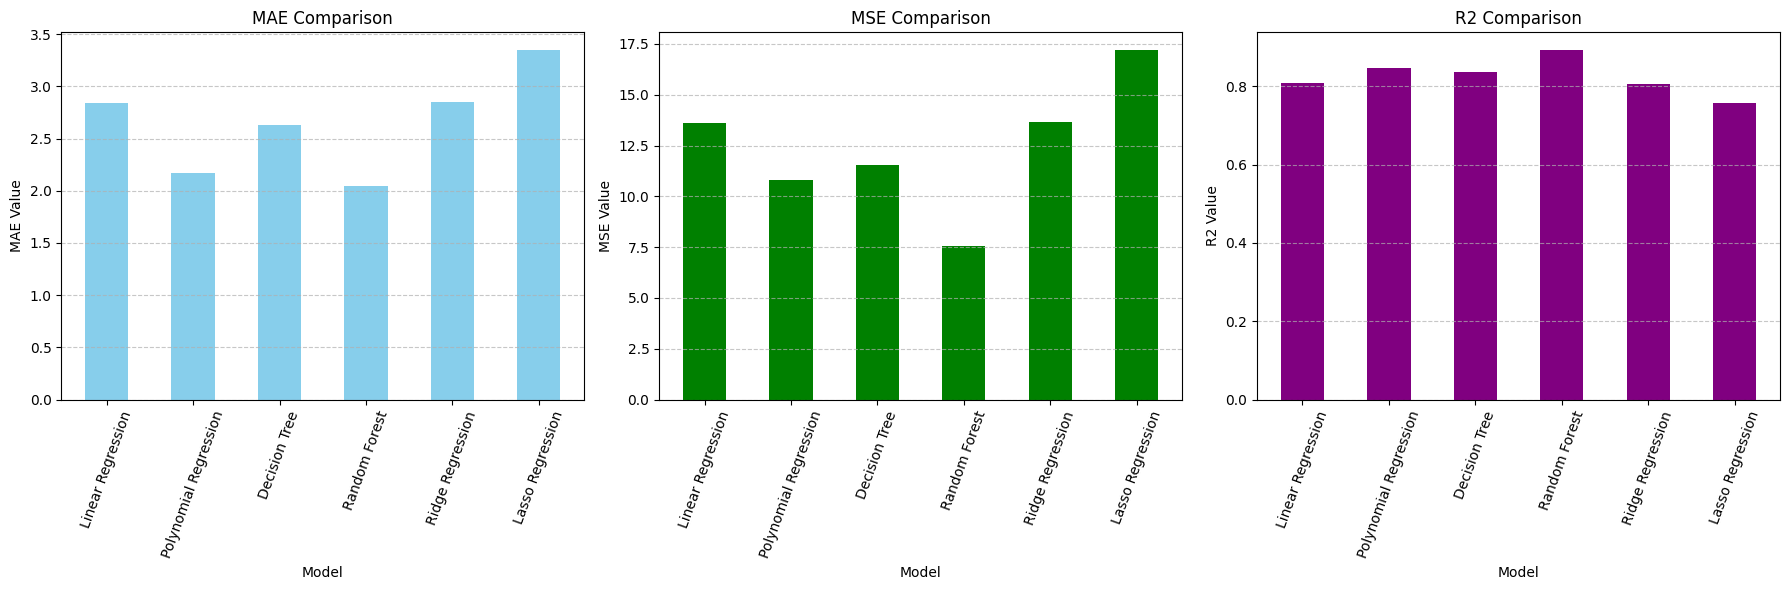

In [25]:
# 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  

colors = ['skyblue', 'green', 'purple']

# 그래프를 각각 생성
for ax, metric, color in zip(axes, ['MAE', 'MSE', 'R2'], colors):
    ax.bar(results['Model'], results[metric], color=color, width=0.5)
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(f'{metric} Value')
    ax.set_xlabel('Model')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    # x축 기울기
    ax.set_xticks(np.arange(len(results['Model'])))
    ax.set_xticklabels(results['Model'], rotation=70)

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

### 6. 모델 앙상블

#### 배깅 모델

In [26]:
from sklearn.ensemble import BaggingRegressor

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 배깅 모델 생성
bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)

# 모델 학습
bagging_model.fit(X_train_scaled, y_train)

# 예측
y_bagging_pred = bagging_model.predict(X_test_scaled)

# 평가
bagging_mae = mean_absolute_error(y_test, y_bagging_pred)
bagging_mse = mean_squared_error(y_test, y_bagging_pred)
bagging_r2 = r2_score(y_test, y_bagging_pred)

print(f'Mean Absolute Error (MAE) : {bagging_mae}')
print(f'Mean Squared Error (MSE) : {bagging_mse}')
print(f'R² Score : {bagging_r2}')

Mean Absolute Error (MAE) : 2.0510085784313685
Mean Squared Error (MSE) : 7.640245488817396
R² Score : 0.8920427009617293


#### 부스팅 모델

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 부스팅 모델 생성
boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# 모델 학습
boosting_model.fit(X_train_scaled, y_train)

# 예측
y_boosting_pred = boosting_model.predict(X_test_scaled)

# 평가
boosting_mae = mean_absolute_error(y_test, y_boosting_pred)
boosting_mse = mean_squared_error(y_test, y_boosting_pred)
boosting_r2 = r2_score(y_test, y_boosting_pred)

print(f'Mean Absolute Error (MAE) : {boosting_mae}')
print(f'Mean Squared Error (MSE) : {boosting_mse}')
print(f'R² Score : {boosting_r2}')

Mean Absolute Error (MAE) : 1.9960937426288416
Mean Squared Error (MSE) : 7.705495048828702
R² Score : 0.8911207192960138


#### 가중 평균 앙상블

In [28]:
# r2점수를 저장할 리스트
model_pred = [y_lr_pred, y_pr_pred, y_tree_pred, y_rf_pred, y_ri_pred, y_ls_pred, y_bagging_pred, y_boosting_pred]
model_r2_score = [lr_r2, pr_r2, tree_r2, rf_r2, ri_r2, ls_r2, bagging_r2, boosting_r2]

print(model_r2_score)

# 성능이 높은 5개 모델 선택
top_models_idx = np.argsort(model_r2_score)[-5:]  # 상위 5개 모델 인덱스
top_pred = [model_pred[i] for i in top_models_idx]
top_scores = [model_r2_score[i] for i in top_models_idx]

# 가중치 계산 (성능 기반)
weights = np.array(top_scores) / sum(top_scores)

# 가중 평균 앙상블
final_pred = sum(w * pred for w, pred in zip(weights, top_pred))

# 성능평가
final_mae = mean_absolute_error(y_test, final_pred)
final_mse = mean_squared_error(y_test, final_pred)
final_r2 = r2_score(y_test, final_pred)

print(f'Mean Absolute Error (MAE) : {final_mae}')
print(f'Mean Squared Error (MSE) : {final_mse}')
print(f'R² Score : {final_r2}')

[0.8076426144528726, 0.8469916425928349, 0.836677978287313, 0.8933241768252906, 0.8072114581993948, 0.7568064617493341, 0.8920427009617293, 0.8911207192960138]
Mean Absolute Error (MAE) : 1.9761873324650965
Mean Squared Error (MSE) : 7.197953055304591
R² Score : 0.898292329534135


### 7. 하이퍼파라미터 튜닝

##### 랜덤포레스트

In [29]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [300], 
    'max_depth': [3, 5, 7, 10], 
    'min_samples_split': [6 ,8, 12, 18],
    'min_samples_leaf': [6, 8, 16, 20],
}


rf_clf = RandomForestRegressor(random_state=0, n_jobs=-1) # n_jobs = -1 : 모든 CPU 코어를 사용하여 학습
grid_cv = GridSearchCV(rf_clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 : \n', grid_cv.best_score_)

최적 하이퍼 파라미터 : 
 {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 300}
최고 예측 정확도 : 
 0.801963552185455


In [30]:

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 최적 모델로 예측
best_rf_model = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_leaf=6, min_samples_split=6)
best_rf_model.fit(X_train_scaled, y_train)
y_rf_pred = best_rf_model.predict(X_test_scaled)

# 모델 평가
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f'Mean Absolute Error (MAE): {rf_mae}')
print(f'Mean Squared Error (MSE): {rf_mse}')
print(f'R² Score: {rf_r2}')

Mean Absolute Error (MAE): 2.185475702563718
Mean Squared Error (MSE): 8.39765881775206
R² Score: 0.8813403881411465


#### 랜덤서치

In [31]:
from sklearn.model_selection import RandomizedSearchCV

# 하이퍼파라미터 분포 설정
param_dist = {
    'n_estimators': [300],
    'max_depth': [5, 7, 10, 15], 
    'min_samples_split': [4 ,6 ,8, 12],
    'min_samples_leaf': [6, 8, 16, 20],
    'bootstrap': [True, False]
}


rf_clf = RandomForestRegressor(random_state=0, n_jobs=-1) # n_jobs = -1 : 모든 CPU 코어를 사용하여 학습
random_cv = RandomizedSearchCV(rf_clf, param_distributions=param_dist, cv=5, n_jobs=-1)
random_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : \n', random_cv.best_params_)
print('최고 예측 정확도 : \n', random_cv.best_score_)

최적 하이퍼 파라미터 : 
 {'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_depth': 15, 'bootstrap': True}
최고 예측 정확도 : 
 0.792916494363949


In [32]:
# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 최적 모델로 예측
best_rf_model = RandomForestRegressor(n_estimators=300, max_depth=7, min_samples_leaf=6, min_samples_split=4, bootstrap=True)
best_rf_model.fit(X_train_scaled, y_train)
y_rf_pred = best_rf_model.predict(X_test_scaled)

# 모델 평가
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f'Mean Absolute Error (MAE): {rf_mae}')
print(f'Mean Squared Error (MSE): {rf_mse}')
print(f'R² Score: {rf_r2}')

Mean Absolute Error (MAE): 2.178431949376764
Mean Squared Error (MSE): 8.357718351799498
R² Score: 0.8819047502199409
